In [1]:
# Package Imports
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
# Data import
df = pd.read_stata("../../data/raw/ESS9e03_1.dta", convert_categoricals = False)

# Subsetting Columns

All columns of the themes on Media & Social Trust, Politics, Human Values, Justive & Fairness, and Timing of Life will be selected. Features link political, social, and moral views to try to cluster the data.

In [3]:
df.columns.get_loc("vote")

24

In [4]:
# Creates an array of column indicies to extract
# First array is for Media and Politics themes combined,
# Second array is for Human Values and Justice & Fairness,
# and the third is for Timing of Life
cols = np.concatenate([np.arange(6, 114), np.arange(497, 551), np.arange(200, 236)])
df_final = df.iloc[:, cols]

In [5]:
df_final.head()

,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,...,tygrtr,tolvpnt,tochld,towkht,anvcld,alvgptn,acldnmr,aftjbyc,advcyc,plnftr
0,60.0,5.0,180.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,...,111.0,30.0,45.0,0.0,4.0,4.0,4.0,4.0,4.0,2.0
1,10.0,5.0,20.0,7.0,8.0,7.0,2.0,3.0,2.0,3.0,...,55.0,30.0,45.0,60.0,4.0,4.0,4.0,2.0,2.0,4.0
2,60.0,4.0,180.0,5.0,7.0,7.0,4.0,2.0,1.0,3.0,...,0.0,0.0,55.0,57.0,3.0,3.0,3.0,3.0,3.0,2.0
3,45.0,5.0,120.0,3.0,9.0,5.0,3.0,2.0,2.0,3.0,...,45.0,30.0,65.0,NaN,3.0,4.0,4.0,3.0,4.0,1.0
4,30.0,1.0,NaN,5.0,8.0,4.0,2.0,1.0,1.0,1.0,...,20.0,25.0,40.0,60.0,2.0,2.0,2.0,2.0,2.0,7.0


# Missing Values

<AxesSubplot:>

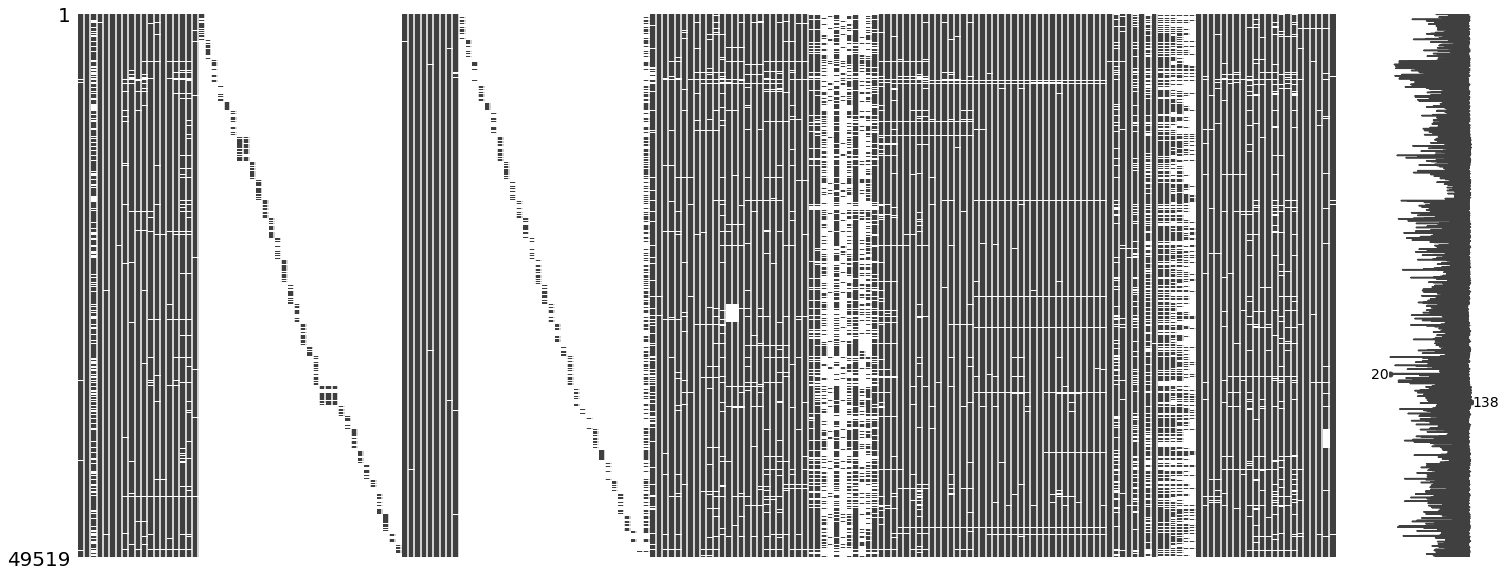

In [6]:
msno.matrix(df_final)

It appears there are certain columns with tons of missing data. Based on the columns selected, these are the columns with country-specific values within the Politics theme. These will be removed.

In [7]:
9

9

In [8]:
# Removes country-specific columns
drop_cols = np.concatenate([np.arange(19,51), np.arange(60,89)])
df_final.drop(df_final.columns[drop_cols], axis = 1, inplace = True)

C:\Users\Matt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

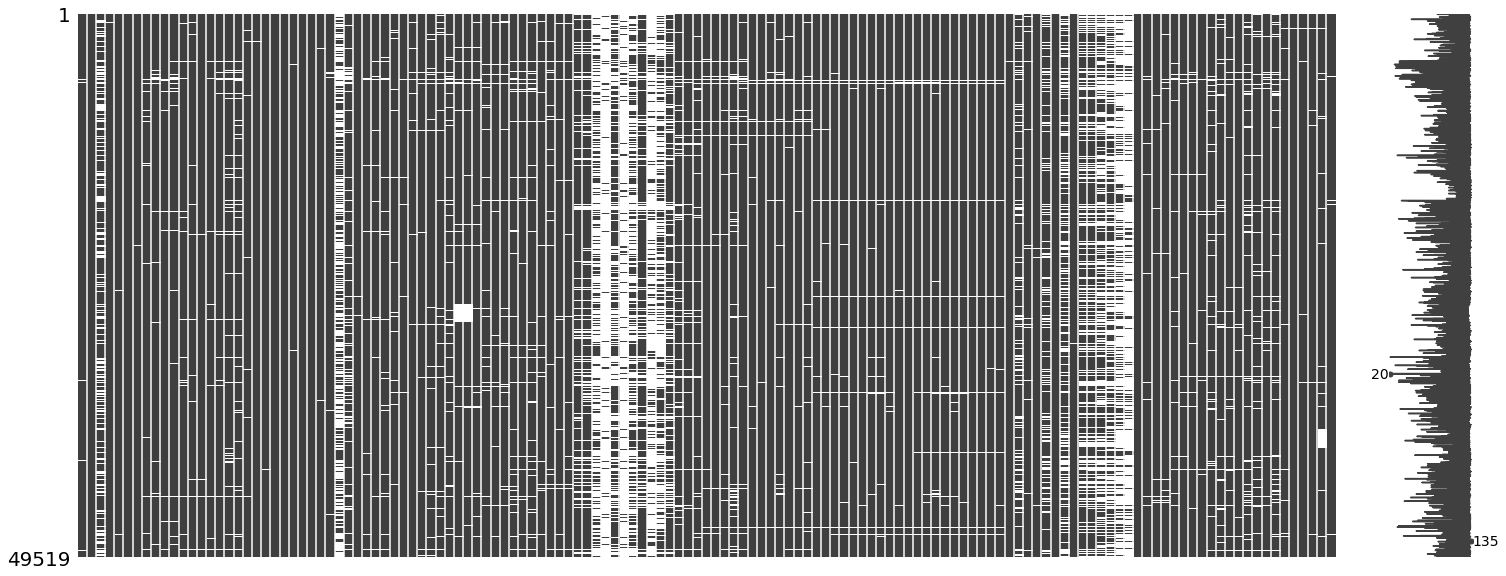

In [9]:
msno.matrix(df_final)

No other values appear to be systematically missing. Lets see how many missing values there are in the most sparse columns.

In [10]:
df_final.isnull().sum().sort_values(ascending = False)[0:25]

grsplet    46177
netilet    45149
ggchld     42141
frlgrsp    37527
ygcdbyr    34396
grspnum    31248
prtdgcl    28233
frlneti    25732
ycldbyr    25052
grspfr     24564
ngchld     23631
netinum    16682
maryr      16311
fcldbrn    15303
netustm    15080
nbthcld    14919
lvptnyr    10909
occinfr     9394
pdempyr     8769
netifr      7942
lrscale     7250
infqbst     7179
fvgabc      5508
recimg      4870
towkht      4503
dtype: int64

There's no noticeable pattern, but leaving these values likely shouldn't cause an issue for PCA and may be of use. We'll leave them in.

# Saving Data

In [11]:
df_final.to_csv("../../data/processed/ESS2018_Cleaned.csv")